In [103]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading the data from roboflow

In [2]:
import os
# set up environment
os.environ["DATASET_DIRECTORY"] = "C:\\Users\\prabh\\OneDrive\\Documents\\GitHub\\case_study_1\\experiment_data\\raw_data\\images"
os.environ["HOME"] = "C:\\Users\\prabh\\OneDrive\\Documents\\GitHub\\case_study_1\\experiment_data\\raw_data\\images"

In [3]:
#after following the link above, recieve python code with these fields filled in
from roboflow import Roboflow
rf = Roboflow(api_key="HDll2oFm5X8KK35ziZJL")
project = rf.workspace().project("casestudy1/smart-traffic-light")
dataset = project.version("27").download("yolov5")
# manually extract it using 7-zip for windows

In [4]:
def get_random_image(img_dir=os.environ["HOME"], version="smart-traffic-light-27", img_type="train"):
    rand_num = random.randint(1,100)
    image_main_path = os.path.join(os.environ["HOME"], "smart-traffic-light-27", img_type, "images")
    image_name = os.listdir(image_main_path)[rand_num]
    return os.path.join(image_main_path,image_name)

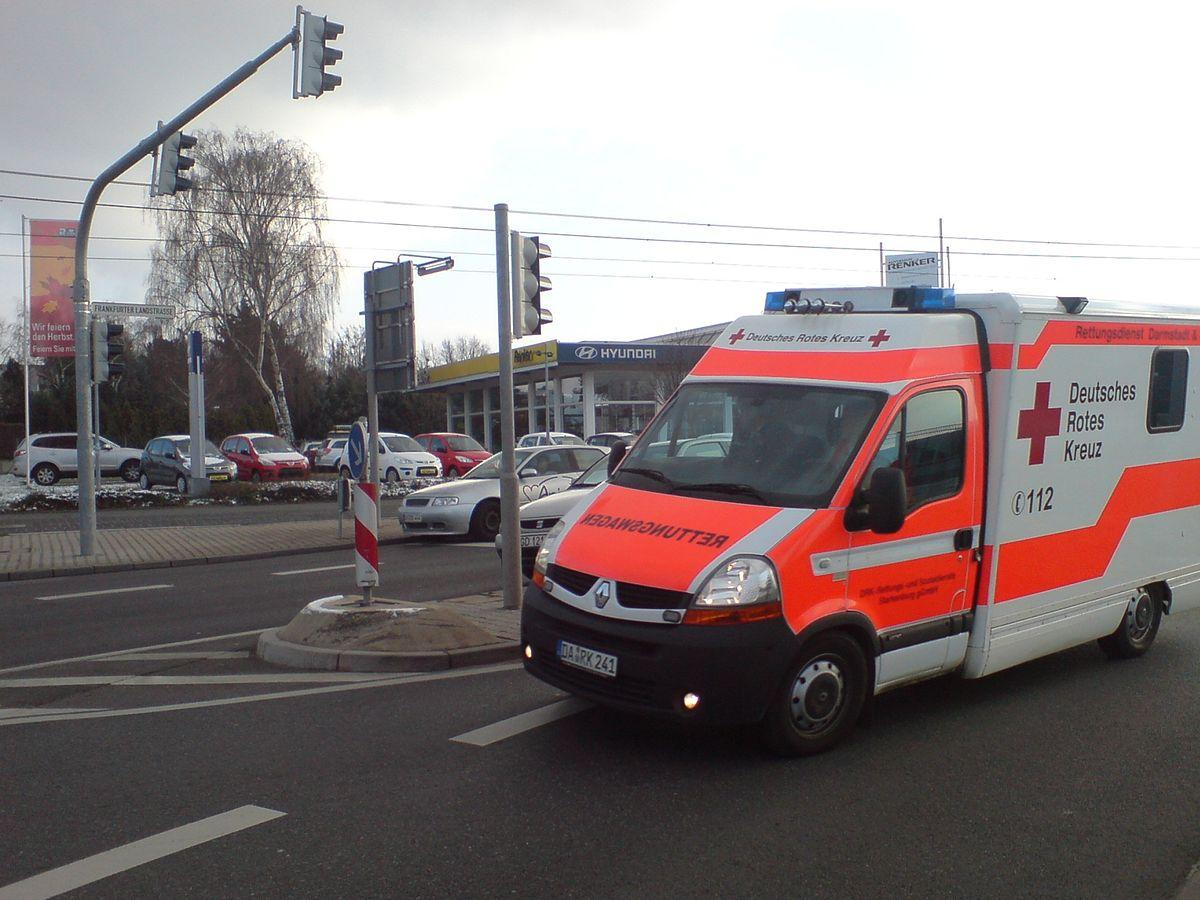

In [5]:
from PIL import Image
img = Image.open(get_random_image())
img

### Exploring optimal image size

In [63]:
# Uncomment below code if running for the first time
# collecting count of different image size
# base_raw_data_path = os.path.join(os.environ["HOME"], "smart-traffic-light-27", "train", "images")
# import cv2
# res_count_dict = {}

# for idx, img_file in enumerate(os.listdir(base_raw_data_path)):
#     cur_file_name = os.path.join(base_raw_data_path,img_file)
#     ext = os.path.splitext(cur_file_name)[1]
#     new_file_name = os.path.join(base_raw_data_path, f"{idx}{ext}")    
#     try :
#         if cur_file_name != new_file_name:
#             os.rename(cur_file_name, new_file_name)
#         im = cv2.imread(os.path.join(base_raw_data_path,new_file_name))
#         if im.shape[:2] not in res_count_dict:
#             res_count_dict[im.shape[:2]] = 0
#         res_count_dict[im.shape[:2]] += 1 
#     except FileNotFoundError:
#         print(f"Error : {img_file}")
#     except FileExistsError:
#         pass

In [9]:
base_raw_data_path = os.path.join(os.environ["HOME"], "smart-traffic-light-27", "train", "images")
res_count_dict = {}
for img_file in os.listdir(base_raw_data_path):
    im = cv2.imread(os.path.join(base_raw_data_path,img_file))
    if im.shape[:2] not in res_count_dict:
        res_count_dict[im.shape[:2]] = 0
    res_count_dict[im.shape[:2]] += 1 

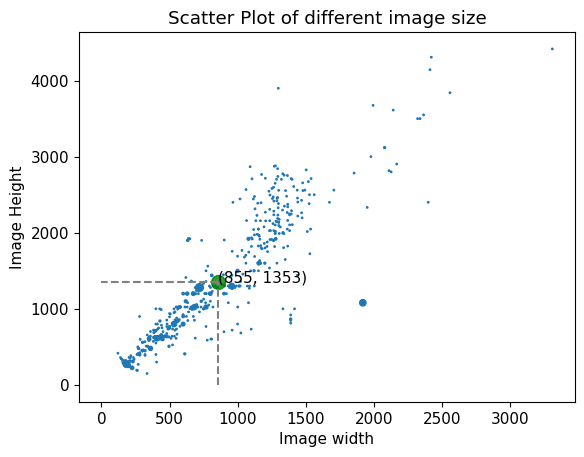

In [18]:
x = [key[0] for key in res_count_dict.keys()]
y = [key[1] for key in res_count_dict.keys()]
size = [value for value in res_count_dict.values()]
plt.scatter(x, y, s=size)

avg_x, avg_y = np.mean(x), np.mean(y)
plt.scatter(avg_x, avg_y, s=100, c='green', alpha=0.8, label='Average')
plt.annotate(f"({int(avg_x)}, {int(avg_y)})", (avg_x, avg_y))

plt.plot([avg_x, avg_x], [0, avg_y], '--', color='gray')
plt.plot([avg_x, 0], [avg_y, avg_y], '--', color='gray')

plt.xlabel('Image width')
plt.ylabel('Image Height')
plt.title('Scatter Plot of different image size')
plt.show()

### Results analysis (yolov5)

#### Optimal image size selection

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [12]:
yolov5_path = "C:\\Users\\prabh\\OneDrive\\Documents\\GitHub\\case_study_1\\experiment_data\\raw_data\\results\\yolov5"
test_img_sizes = [300, 400, 500, 600, 700, 800, 900, 1000, 1100]

In [176]:
results_mAP = {'.5': [], '.5-.95': []}
for i in range(6):
    df = pd.read_csv(os.path.join(yolov5_path, f"results_{i}.csv"))
    results_mAP['.5'].append(df['     metrics/mAP_0.5'].values[-1])
    results_mAP['.5-.95'].append(df['metrics/mAP_0.5:0.95'].values[-1])

In [177]:
results_mAP['.5']

[0.84537, 0.85549, 0.85549, 0.85053, 0.85053, 0.85053]

In [178]:
test_img_sizes[:6]

[300, 400, 500, 600, 700, 800]

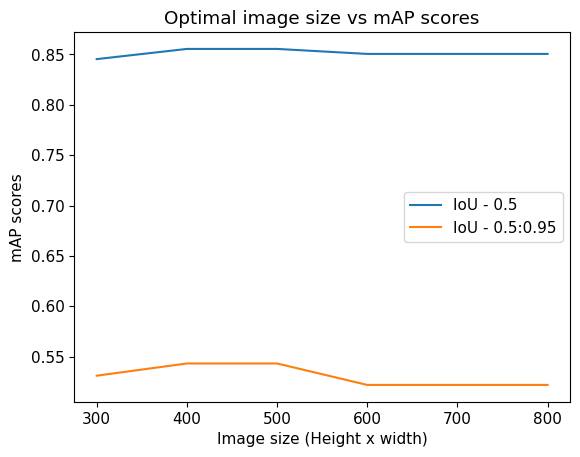

In [179]:
plt.plot(test_img_sizes[:6], results_mAP['.5'], label="IoU - 0.5")
plt.plot(test_img_sizes[:6], results_mAP['.5-.95'], label= "IoU - 0.5:0.95")

plt.xlabel('Image size (Height x width)')
plt.ylabel('mAP scores')
plt.title('Optimal image size vs mAP scores (Validation Dataset)')
plt.legend()
plt.show()

> Conclusion : The optimal size is 400 since we get the best mAP score with that image size

#### Analysis of when the model converges

In [180]:
df = pd.read_csv(os.path.join(yolov5_path, f"results_1.csv"))

In [181]:
df.columns

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

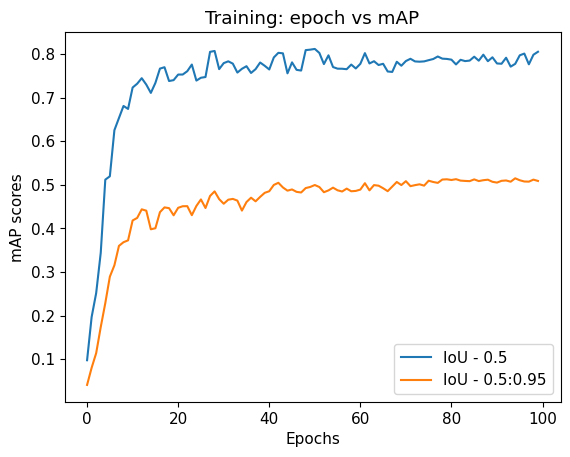

In [182]:
plt.plot(df['               epoch'][:100], df['     metrics/mAP_0.5'].values[:100], label= "IoU - 0.5")
plt.plot(df['               epoch'][:100], df['metrics/mAP_0.5:0.95'].values[:100], label= "IoU - 0.5:0.95")

plt.xlabel('Epochs')
plt.ylabel('mAP scores')
plt.title('Training: epoch vs mAP')
plt.legend()
plt.show()

> Conclusion : The models converges around 50, so training should be done till epoch 50

#### Comparison of training loss and validation loss

This will ensure that we don't get an overfitted model

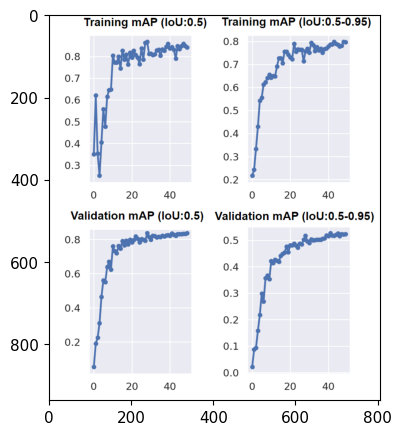

In [183]:
from PIL import Image
img = Image.open(os.path.join(yolov5_path, "exp_400_imsize\\exp", "train_vs_val_mAP_only.png"))
fig, ax = plt.subplots(figsize=(8, 5))

ax.imshow(img)

plt.show()

> Model Selected for inferencing - `model with mAP(IoU : 0.5) - 0.85 and mAP(IoU : 0.5-0.95) - 0.52`

#### Inference analysis: Image

In [13]:
import torch
import cv2
from PIL import Image
import json
import matplotlib.pyplot as plt
model = torch.hub.load('ultralytics/yolov5', 'custom', path=os.path.join(yolov5_path, 'exp_400_imsize\\exp\\weights','best.pt'))

Using cache found in C:\Users\prabh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-8 Python-3.10.8 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [91]:
test_img_path = get_random_image(img_type='valid')

img = Image.open(test_img_path)
results = model(img, size=400)

results_list = json.loads(results.pandas().xyxy[0].to_json(orient="records"))

cv2_img = cv2.imread(test_img_path)
for coord in results_list:
    xmin = int(coord['xmin'])
    ymin = int(coord['ymin'])
    xmax = int(coord['xmax'])
    ymax = int(coord['ymax'])
    cv2.rectangle(cv2_img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    label = coord['name']
    cv2.putText(cv2_img, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
# cv2.resizeWindow('image', 800, 800)
cv2.imshow('image', cv2_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# press q to exit the window

In [370]:
cv2_img = cv2.imread(test_img_path)

In [15]:
cv2_img.shape

(1144, 1684, 3)

#### Inference analysis: Video

In [395]:
cap = cv2.VideoCapture(os.path.join(yolov8_path, 'normal_single_road_original.mp4'))
fps = cap.get(cv2.CAP_PROP_FPS)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
codec = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('output_yolov5.avi',codec,fps, (int(width),\
                                                    int (height)))

In [396]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        results = model(frame, size=400)
        results_list = json.loads(results.pandas().xyxy[0].to_json(orient="records"))
        for coord in results_list:
            xmin = int(coord['xmin'])
            ymin = int(coord['ymin'])
            xmax = int(coord['xmax'])
            ymax = int(coord['ymax'])
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            label = coord['name']
            cv2.putText(frame, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        out.write(frame)
    else:
        break
cap.release()
out.release()

#### Inference analysis : Video Benchmarking

In [397]:
import time

# initialization of video writer and reader
cap = cv2.VideoCapture(os.path.join(yolov8_path, 'normal_single_road_original.mp4'))
fps = cap.get(cv2.CAP_PROP_FPS)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
codec = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('output_yolov5.avi',codec,fps, (int(width),\
                                                    int (height)))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        num_frames += 1
        
        start_time = time.time()
        results = model(frame, size=400)
        results_list = json.loads(results.pandas().xyxy[0].to_json(orient="records"))
        for coord in results_list:
            xmin = int(coord['xmin'])
            ymin = int(coord['ymin'])
            xmax = int(coord['xmax'])
            ymax = int(coord['ymax'])
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            label = coord['name']
            cv2.putText(frame, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        end_time = time.time()
        
        ttl_time += end_time - start_time
        
        out.write(frame)
    else:
        break
cap.release()
out.release()

avg_time_per_frame = ttl_time / num_frames

print("Average time per frame: {:.2f} milliseconds".format(avg_time_per_frame * 1e3))

Average time per frame: 210.46 milliseconds


### Results analysis (yolov8)

#### Optimal image size selection

In [184]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [38]:
yolov8_path = "C:\\Users\\prabh\\OneDrive\\Documents\\GitHub\\case_study_1\\experiment_data\\raw_data\\results\\yolov8"
test_img_sizes = [300, 400, 500, 600, 700, 800, 900, 1000, 1100]

In [186]:
results_mAP = {'.5': [], '.5-.95': []}
for i in range(6):
    df = pd.read_csv(os.path.join(yolov8_path, f"results_{i}.csv"))
    results_mAP['.5'].append(df['       metrics/mAP50(B)'].values[-1])
    results_mAP['.5-.95'].append(df['    metrics/mAP50-95(B)'].values[-1])

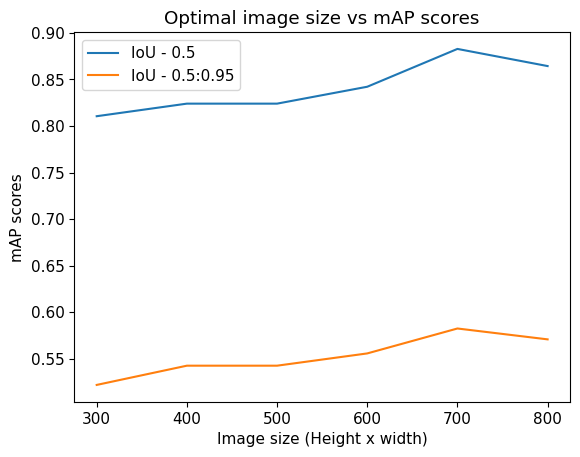

In [187]:
plt.plot(test_img_sizes[:6], results_mAP['.5'], label="IoU - 0.5")
plt.plot(test_img_sizes[:6], results_mAP['.5-.95'], label= "IoU - 0.5:0.95")

plt.xlabel('Image size (Height x width)')
plt.ylabel('mAP scores')
plt.title('Optimal image size vs mAP scores')
plt.legend()
plt.show()

> Conclusion : The optimal size is 700 since we get the best mAP score with that image size

#### Analysis of when the model converges

In [188]:
df = pd.read_csv(os.path.join(yolov8_path, f"results_4.csv"))

In [189]:
df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

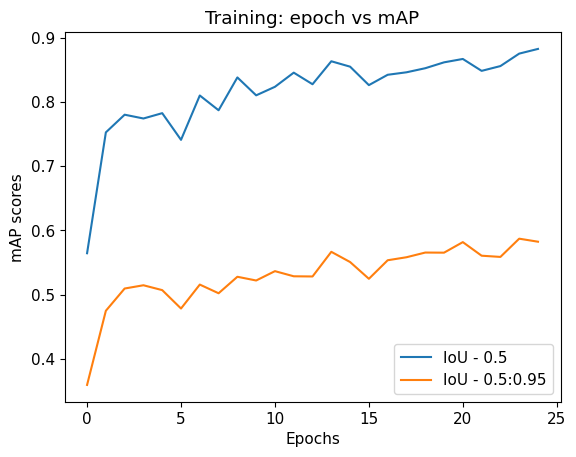

In [190]:
plt.plot(df['                  epoch'][:100], df['       metrics/mAP50(B)'].values[:100], label= "IoU - 0.5")
plt.plot(df['                  epoch'][:100], df['    metrics/mAP50-95(B)'].values[:100], label= "IoU - 0.5:0.95")

plt.xlabel('Epochs')
plt.ylabel('mAP scores')
plt.title('Training: epoch vs mAP')
plt.legend()
plt.show()

> Conclusion : The models converges around 50, so training should be done till epoch 25

#### Comparison of training loss and validation loss

This will ensure that we don't get an overfitted model

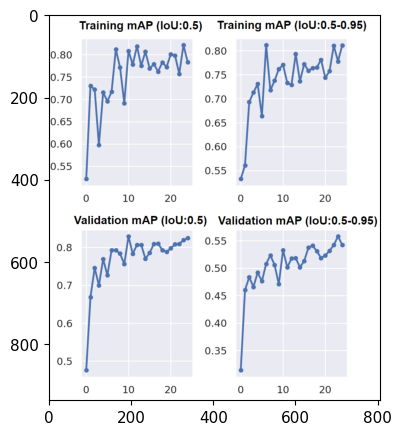

In [191]:
from PIL import Image
img = Image.open(os.path.join(yolov8_path, "train4", "mAP_train_vs_valid_loss.png"))
fig, ax = plt.subplots(figsize=(8, 5))

ax.imshow(img)

plt.show()

> Model Selected for inferencing - `model with mAP(IoU : 0.5) - 0.88 and mAP(IoU : 0.5-0.95) - 0.6`

#### Inference analysis: Image

In [39]:
from ultralytics import YOLO
yolov8_model = YOLO(os.path.join(yolov8_path, 'train4\\weights','best.pt'))

In [67]:
test_img_path = get_random_image(img_type='valid')
img = Image.open(test_img_path)

results = yolov8_model.predict(img, imgsz=700)


cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', 800, 800)
cv2.imshow("image", results[0].plot())
cv2.waitKey(0)
cv2.destroyAllWindows()
# press q to close the window


WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]
0: 704x416 20 cars, 4 motorbikes, 2 transport_vehicles, 266.1ms
Speed: 2.0ms preprocess, 266.1ms inference, 3.0ms postprocess per image at shape (1, 3, 704, 704)


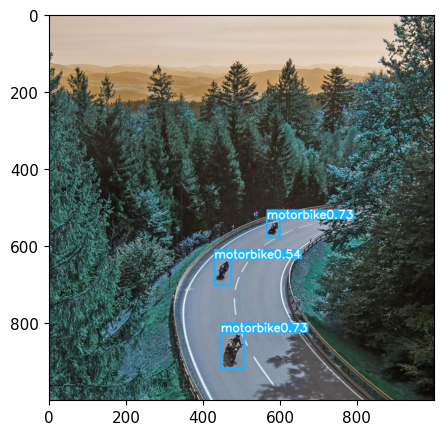

In [322]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.imshow(results[0].plot())
plt.show()

#### Inference analysis: Video

In [353]:
cap = cv2.VideoCapture(os.path.join(yolov8_path, 'normal_single_road_original.mp4'))
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi', fourcc, 20.0, (700, 700))
fps = cap.get(cv2.CAP_PROP_FPS)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
codec = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('output.avi',codec,fps, (int(width),\
                                                    int (height)))

In [350]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        results = yolov8_model.predict(frame, imgsz=700)
        out.write(results[0].plot())
    else:
        break
cap.release()
out.release()


WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]
0: 416x704 5 cars, 1 transport_vehicle, 283.7ms
Speed: 2.0ms preprocess, 283.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 266.4ms
Speed: 1.0ms preprocess, 266.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 299.4ms
Speed: 2.0ms preprocess, 299.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 1 transport_vehicle, 282.6ms
Speed: 1.0ms preprocess, 282.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 247.1ms
Speed: 1.0ms preprocess, 247.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 290.6ms
Speed: 1.0ms preprocess, 290.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 272.6ms
Speed: 2.0ms preprocess, 272.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 302.5ms
Speed: 2.1ms preprocess, 302.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 1 transport_vehicle, 263.4ms
Speed: 2.0ms preprocess, 263.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 1 transport_vehicle, 289.6ms
Speed: 1.0ms preprocess, 289.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 1 transport_vehicle, 271.5ms
Speed: 1.0ms preprocess, 271.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 1 transport_vehicle, 267.6ms
Speed: 1.0ms preprocess, 267.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 272.8ms
Speed: 1.0ms preprocess, 272.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 1 transport_vehicle, 268.6ms
Speed: 1.0ms preprocess, 268.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 275.6ms
Speed: 2.0ms preprocess, 275.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 275.1ms
Speed: 1.0ms preprocess, 275.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 1 transport_vehicle, 279.8ms
Speed: 1.0ms preprocess, 279.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 1 transport_vehicle, 328.1ms
Speed: 1.0ms preprocess, 328.1ms inference, 3.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 304.2ms
Speed: 2.0ms preprocess, 304.2ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 300.3ms
Speed: 1.0ms preprocess, 300.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 324.1ms
Speed: 2.0ms preprocess, 324.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 292.3ms
Speed: 1.0ms preprocess, 292.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 271.6ms
Speed: 1.0ms preprocess, 271.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 269.6ms
Speed: 1.0ms preprocess, 269.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 285.6ms
Speed: 1.0ms preprocess, 285.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 274.6ms
Speed: 1.0ms preprocess, 274.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 279.6ms
Speed: 3.0ms preprocess, 279.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 279.8ms
Speed: 3.0ms preprocess, 279.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 273.6ms
Speed: 1.0ms preprocess, 273.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 290.6ms
Speed: 4.0ms preprocess, 290.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 263.0ms
Speed: 1.0ms preprocess, 263.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 259.6ms
Speed: 1.0ms preprocess, 259.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 269.0ms
Speed: 1.0ms preprocess, 269.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 268.1ms
Speed: 2.0ms preprocess, 268.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 1 transport_vehicle, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 282.6ms
Speed: 1.0ms preprocess, 282.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 257.6ms
Speed: 1.0ms preprocess, 257.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 276.8ms
Speed: 1.0ms preprocess, 276.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 294.1ms
Speed: 2.0ms preprocess, 294.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 261.1ms
Speed: 1.0ms preprocess, 261.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 260.6ms
Speed: 1.0ms preprocess, 260.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 275.2ms
Speed: 1.5ms preprocess, 275.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.2ms
Speed: 2.0ms preprocess, 280.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.6ms
Speed: 2.0ms preprocess, 278.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 264.7ms
Speed: 3.0ms preprocess, 264.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 267.6ms
Speed: 3.0ms preprocess, 267.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 269.8ms
Speed: 0.5ms preprocess, 269.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 261.4ms
Speed: 1.0ms preprocess, 261.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 291.3ms
Speed: 1.0ms preprocess, 291.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 271.0ms
Speed: 2.0ms preprocess, 271.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 275.1ms
Speed: 2.0ms preprocess, 275.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 264.0ms
Speed: 2.0ms preprocess, 264.0ms inference, 0.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 267.5ms
Speed: 1.0ms preprocess, 267.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 268.4ms
Speed: 1.0ms preprocess, 268.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 268.0ms
Speed: 3.0ms preprocess, 268.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 267.6ms
Speed: 2.0ms preprocess, 267.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 248.4ms
Speed: 1.0ms preprocess, 248.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 261.5ms
Speed: 1.0ms preprocess, 261.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 263.7ms
Speed: 1.0ms preprocess, 263.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 267.9ms
Speed: 1.0ms preprocess, 267.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 272.6ms
Speed: 1.0ms preprocess, 272.6ms inference, 1.5ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 288.6ms
Speed: 1.0ms preprocess, 288.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 298.0ms
Speed: 2.0ms preprocess, 298.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 276.5ms
Speed: 1.0ms preprocess, 276.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 277.6ms
Speed: 1.0ms preprocess, 277.6ms inference, 1.1ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 270.6ms
Speed: 1.0ms preprocess, 270.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 309.1ms
Speed: 1.0ms preprocess, 309.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 265.6ms
Speed: 2.0ms preprocess, 265.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 264.6ms
Speed: 1.0ms preprocess, 264.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 296.4ms
Speed: 2.0ms preprocess, 296.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 267.2ms
Speed: 2.0ms preprocess, 267.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 287.5ms
Speed: 1.0ms preprocess, 287.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 266.3ms
Speed: 1.0ms preprocess, 266.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 283.1ms
Speed: 1.0ms preprocess, 283.1ms inference, 1.5ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 266.7ms
Speed: 1.0ms preprocess, 266.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 283.1ms
Speed: 0.5ms preprocess, 283.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 251.6ms
Speed: 1.0ms preprocess, 251.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 285.6ms
Speed: 3.0ms preprocess, 285.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 255.6ms
Speed: 1.0ms preprocess, 255.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 274.7ms
Speed: 1.0ms preprocess, 274.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 262.2ms
Speed: 1.0ms preprocess, 262.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 268.1ms
Speed: 2.0ms preprocess, 268.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 292.5ms
Speed: 2.0ms preprocess, 292.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 301.6ms
Speed: 2.0ms preprocess, 301.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 264.6ms
Speed: 2.0ms preprocess, 264.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 267.3ms
Speed: 1.0ms preprocess, 267.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 279.0ms
Speed: 2.0ms preprocess, 279.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 274.3ms
Speed: 3.0ms preprocess, 274.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 279.9ms
Speed: 1.0ms preprocess, 279.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 261.6ms
Speed: 1.0ms preprocess, 261.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 276.1ms
Speed: 2.0ms preprocess, 276.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 269.7ms
Speed: 1.0ms preprocess, 269.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 268.1ms
Speed: 3.0ms preprocess, 268.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 262.5ms
Speed: 1.0ms preprocess, 262.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 263.1ms
Speed: 2.0ms preprocess, 263.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 276.8ms
Speed: 1.0ms preprocess, 276.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 269.6ms
Speed: 1.0ms preprocess, 269.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 275.3ms
Speed: 1.0ms preprocess, 275.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 267.6ms
Speed: 1.0ms preprocess, 267.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 275.1ms
Speed: 1.0ms preprocess, 275.1ms inference, 1.1ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 279.8ms
Speed: 1.0ms preprocess, 279.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 268.9ms
Speed: 2.0ms preprocess, 268.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 263.6ms
Speed: 1.0ms preprocess, 263.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.7ms
Speed: 1.0ms preprocess, 284.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.1ms
Speed: 1.0ms preprocess, 280.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.7ms
Speed: 2.0ms preprocess, 278.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 271.3ms
Speed: 1.0ms preprocess, 271.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 263.3ms
Speed: 2.0ms preprocess, 263.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 265.6ms
Speed: 1.0ms preprocess, 265.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 265.6ms
Speed: 2.0ms preprocess, 265.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.8ms
Speed: 1.0ms preprocess, 284.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 277.7ms
Speed: 3.0ms preprocess, 277.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 271.7ms
Speed: 2.0ms preprocess, 271.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 283.6ms
Speed: 1.0ms preprocess, 283.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 268.6ms
Speed: 1.0ms preprocess, 268.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 286.6ms
Speed: 2.0ms preprocess, 286.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 263.6ms
Speed: 1.0ms preprocess, 263.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 274.3ms
Speed: 1.0ms preprocess, 274.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 276.6ms
Speed: 1.0ms preprocess, 276.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 279.0ms
Speed: 1.0ms preprocess, 279.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 269.8ms
Speed: 1.0ms preprocess, 269.8ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 271.0ms
Speed: 1.0ms preprocess, 271.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 286.6ms
Speed: 1.0ms preprocess, 286.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.2ms
Speed: 2.0ms preprocess, 275.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 261.2ms
Speed: 1.0ms preprocess, 261.2ms inference, 1.5ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 271.3ms
Speed: 1.0ms preprocess, 271.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 270.0ms
Speed: 1.0ms preprocess, 270.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 273.6ms
Speed: 1.0ms preprocess, 273.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 283.1ms
Speed: 1.0ms preprocess, 283.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 266.7ms
Speed: 2.0ms preprocess, 266.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 261.6ms
Speed: 1.0ms preprocess, 261.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 271.4ms
Speed: 1.0ms preprocess, 271.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.6ms
Speed: 1.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 279.4ms
Speed: 1.0ms preprocess, 279.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 277.7ms
Speed: 1.0ms preprocess, 277.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 267.1ms
Speed: 1.0ms preprocess, 267.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 291.2ms
Speed: 1.0ms preprocess, 291.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 278.6ms
Speed: 2.0ms preprocess, 278.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 276.6ms
Speed: 3.0ms preprocess, 276.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 286.1ms
Speed: 1.0ms preprocess, 286.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 276.9ms
Speed: 1.0ms preprocess, 276.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.3ms
Speed: 1.0ms preprocess, 275.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 305.6ms
Speed: 2.0ms preprocess, 305.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 291.9ms
Speed: 1.0ms preprocess, 291.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 267.5ms
Speed: 1.0ms preprocess, 267.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 271.0ms
Speed: 1.0ms preprocess, 271.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 271.6ms
Speed: 1.0ms preprocess, 271.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 260.9ms
Speed: 1.0ms preprocess, 260.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 273.6ms
Speed: 2.0ms preprocess, 273.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.6ms
Speed: 1.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 272.6ms
Speed: 2.0ms preprocess, 272.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 278.6ms
Speed: 1.0ms preprocess, 278.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 269.6ms
Speed: 2.0ms preprocess, 269.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 292.6ms
Speed: 1.0ms preprocess, 292.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 285.1ms
Speed: 1.0ms preprocess, 285.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 285.6ms
Speed: 2.0ms preprocess, 285.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 270.6ms
Speed: 2.0ms preprocess, 270.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 284.2ms
Speed: 1.0ms preprocess, 284.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 277.1ms
Speed: 1.0ms preprocess, 277.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 297.5ms
Speed: 1.0ms preprocess, 297.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 287.8ms
Speed: 1.0ms preprocess, 287.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 291.6ms
Speed: 1.0ms preprocess, 291.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 274.5ms
Speed: 1.0ms preprocess, 274.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 259.6ms
Speed: 1.0ms preprocess, 259.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 271.4ms
Speed: 1.0ms preprocess, 271.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 261.6ms
Speed: 1.0ms preprocess, 261.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 282.9ms
Speed: 1.0ms preprocess, 282.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 301.6ms
Speed: 1.0ms preprocess, 301.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 261.6ms
Speed: 2.0ms preprocess, 261.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 271.1ms
Speed: 2.0ms preprocess, 271.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 273.6ms
Speed: 2.0ms preprocess, 273.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 281.6ms
Speed: 1.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 266.9ms
Speed: 1.0ms preprocess, 266.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 277.3ms
Speed: 1.0ms preprocess, 277.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 275.8ms
Speed: 1.0ms preprocess, 275.8ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 269.6ms
Speed: 2.0ms preprocess, 269.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 266.2ms
Speed: 1.0ms preprocess, 266.2ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 274.5ms
Speed: 1.0ms preprocess, 274.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 280.6ms
Speed: 1.0ms preprocess, 280.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 276.0ms
Speed: 1.0ms preprocess, 276.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 286.6ms
Speed: 1.0ms preprocess, 286.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 271.6ms
Speed: 2.0ms preprocess, 271.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 260.8ms
Speed: 1.0ms preprocess, 260.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 276.6ms
Speed: 1.0ms preprocess, 276.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 1 car, 269.5ms
Speed: 1.0ms preprocess, 269.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 264.9ms
Speed: 1.0ms preprocess, 264.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 287.9ms
Speed: 1.0ms preprocess, 287.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 290.5ms
Speed: 1.0ms preprocess, 290.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 283.0ms
Speed: 1.0ms preprocess, 283.0ms inference, 1.5ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 270.8ms
Speed: 2.0ms preprocess, 270.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 281.6ms
Speed: 2.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 295.6ms
Speed: 1.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 287.6ms
Speed: 1.0ms preprocess, 287.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 270.4ms
Speed: 1.0ms preprocess, 270.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 267.8ms
Speed: 1.1ms preprocess, 267.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 277.5ms
Speed: 1.0ms preprocess, 277.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 285.5ms
Speed: 1.0ms preprocess, 285.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 272.8ms
Speed: 1.0ms preprocess, 272.8ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 272.5ms
Speed: 2.0ms preprocess, 272.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 281.6ms
Speed: 1.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.6ms
Speed: 1.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 282.1ms
Speed: 1.0ms preprocess, 282.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.5ms
Speed: 1.0ms preprocess, 275.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 289.6ms
Speed: 1.0ms preprocess, 289.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 283.7ms
Speed: 1.0ms preprocess, 283.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 275.8ms
Speed: 2.0ms preprocess, 275.8ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 280.5ms
Speed: 1.0ms preprocess, 280.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 276.9ms
Speed: 1.0ms preprocess, 276.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 263.6ms
Speed: 1.0ms preprocess, 263.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 290.4ms
Speed: 1.0ms preprocess, 290.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 291.1ms
Speed: 1.0ms preprocess, 291.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 287.6ms
Speed: 2.0ms preprocess, 287.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 365.1ms
Speed: 2.0ms preprocess, 365.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 2 police_cars, 311.6ms
Speed: 1.0ms preprocess, 311.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 313.6ms
Speed: 1.0ms preprocess, 313.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 300.6ms
Speed: 1.0ms preprocess, 300.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 281.3ms
Speed: 1.0ms preprocess, 281.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 294.4ms
Speed: 2.0ms preprocess, 294.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 301.6ms
Speed: 0.9ms preprocess, 301.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 274.0ms
Speed: 3.0ms preprocess, 274.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 283.6ms
Speed: 2.0ms preprocess, 283.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 285.6ms
Speed: 1.0ms preprocess, 285.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 288.0ms
Speed: 1.0ms preprocess, 288.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 280.6ms
Speed: 3.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 277.4ms
Speed: 1.0ms preprocess, 277.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 275.2ms
Speed: 1.0ms preprocess, 275.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 289.2ms
Speed: 2.0ms preprocess, 289.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 274.6ms
Speed: 1.0ms preprocess, 274.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 265.6ms
Speed: 1.0ms preprocess, 265.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 284.6ms
Speed: 2.0ms preprocess, 284.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 292.6ms
Speed: 0.0ms preprocess, 292.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 280.8ms
Speed: 1.0ms preprocess, 280.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 289.6ms
Speed: 1.0ms preprocess, 289.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 279.6ms
Speed: 1.0ms preprocess, 279.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 283.7ms
Speed: 1.0ms preprocess, 283.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 278.6ms
Speed: 1.0ms preprocess, 278.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 265.6ms
Speed: 1.0ms preprocess, 265.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 267.8ms
Speed: 2.0ms preprocess, 267.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 278.7ms
Speed: 1.0ms preprocess, 278.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 270.5ms
Speed: 1.0ms preprocess, 270.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 284.6ms
Speed: 1.0ms preprocess, 284.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 318.1ms
Speed: 2.0ms preprocess, 318.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 304.6ms
Speed: 1.0ms preprocess, 304.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 277.7ms
Speed: 1.0ms preprocess, 277.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 281.5ms
Speed: 1.0ms preprocess, 281.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 283.0ms
Speed: 1.0ms preprocess, 283.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 279.0ms
Speed: 1.0ms preprocess, 279.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.6ms
Speed: 1.0ms preprocess, 284.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.6ms
Speed: 2.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 281.6ms
Speed: 1.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 275.6ms
Speed: 2.0ms preprocess, 275.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 267.6ms
Speed: 1.0ms preprocess, 267.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 267.4ms
Speed: 1.0ms preprocess, 267.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 288.3ms
Speed: 1.0ms preprocess, 288.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 274.3ms
Speed: 1.0ms preprocess, 274.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 281.6ms
Speed: 2.0ms preprocess, 281.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.1ms
Speed: 1.0ms preprocess, 280.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 333.1ms
Speed: 1.0ms preprocess, 333.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 307.1ms
Speed: 1.0ms preprocess, 307.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 285.6ms
Speed: 1.0ms preprocess, 285.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 292.1ms
Speed: 1.0ms preprocess, 292.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 283.0ms
Speed: 1.0ms preprocess, 283.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 272.7ms
Speed: 2.0ms preprocess, 272.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 291.6ms
Speed: 1.0ms preprocess, 291.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 267.7ms
Speed: 1.0ms preprocess, 267.7ms inference, 1.5ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 281.5ms
Speed: 1.0ms preprocess, 281.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 282.6ms
Speed: 2.0ms preprocess, 282.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 278.6ms
Speed: 2.0ms preprocess, 278.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 286.6ms
Speed: 2.0ms preprocess, 286.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 290.6ms
Speed: 1.0ms preprocess, 290.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 295.9ms
Speed: 1.0ms preprocess, 295.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 296.5ms
Speed: 1.0ms preprocess, 296.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 276.7ms
Speed: 2.0ms preprocess, 276.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 288.6ms
Speed: 1.0ms preprocess, 288.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 302.6ms
Speed: 1.0ms preprocess, 302.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 286.9ms
Speed: 2.0ms preprocess, 286.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 265.2ms
Speed: 1.0ms preprocess, 265.2ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 276.6ms
Speed: 1.0ms preprocess, 276.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 287.7ms
Speed: 2.0ms preprocess, 287.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 256.6ms
Speed: 1.0ms preprocess, 256.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 283.1ms
Speed: 1.0ms preprocess, 283.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 290.6ms
Speed: 1.0ms preprocess, 290.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 290.3ms
Speed: 1.0ms preprocess, 290.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.3ms
Speed: 1.0ms preprocess, 280.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 283.6ms
Speed: 1.0ms preprocess, 283.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 282.2ms
Speed: 2.0ms preprocess, 282.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 289.4ms
Speed: 1.0ms preprocess, 289.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 274.6ms
Speed: 1.0ms preprocess, 274.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 304.4ms
Speed: 1.0ms preprocess, 304.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 272.7ms
Speed: 0.0ms preprocess, 272.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 275.7ms
Speed: 1.0ms preprocess, 275.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 296.3ms
Speed: 1.0ms preprocess, 296.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 263.9ms
Speed: 1.0ms preprocess, 263.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 287.1ms
Speed: 2.0ms preprocess, 287.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 280.8ms
Speed: 1.0ms preprocess, 280.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 284.7ms
Speed: 2.0ms preprocess, 284.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 279.1ms
Speed: 1.0ms preprocess, 279.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 276.7ms
Speed: 1.0ms preprocess, 276.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 296.2ms
Speed: 0.0ms preprocess, 296.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 278.0ms
Speed: 1.5ms preprocess, 278.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.5ms
Speed: 1.0ms preprocess, 278.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 287.1ms
Speed: 1.0ms preprocess, 287.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 274.2ms
Speed: 1.0ms preprocess, 274.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 1 transport_vehicle, 268.7ms
Speed: 4.0ms preprocess, 268.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 268.9ms
Speed: 1.0ms preprocess, 268.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 263.6ms
Speed: 1.0ms preprocess, 263.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 1 transport_vehicle, 320.6ms
Speed: 1.0ms preprocess, 320.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 1 transport_vehicle, 283.2ms
Speed: 1.0ms preprocess, 283.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.1ms
Speed: 1.0ms preprocess, 284.1ms inference, 1.5ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.1ms
Speed: 1.0ms preprocess, 284.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 290.7ms
Speed: 1.0ms preprocess, 290.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 287.1ms
Speed: 2.0ms preprocess, 287.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 281.1ms
Speed: 2.0ms preprocess, 281.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 295.6ms
Speed: 1.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 293.6ms
Speed: 1.0ms preprocess, 293.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 273.1ms
Speed: 2.1ms preprocess, 273.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 296.4ms
Speed: 1.0ms preprocess, 296.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 264.7ms
Speed: 1.0ms preprocess, 264.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 277.7ms
Speed: 2.0ms preprocess, 277.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 291.9ms
Speed: 2.0ms preprocess, 291.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 259.0ms
Speed: 2.0ms preprocess, 259.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 280.7ms
Speed: 3.0ms preprocess, 280.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 271.7ms
Speed: 0.0ms preprocess, 271.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 271.1ms
Speed: 1.0ms preprocess, 271.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 278.6ms
Speed: 2.0ms preprocess, 278.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 283.6ms
Speed: 1.0ms preprocess, 283.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 273.6ms
Speed: 1.0ms preprocess, 273.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 270.6ms
Speed: 1.0ms preprocess, 270.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 292.6ms
Speed: 2.0ms preprocess, 292.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 304.6ms
Speed: 1.0ms preprocess, 304.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 8 cars, 280.5ms
Speed: 1.0ms preprocess, 280.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 284.7ms
Speed: 1.0ms preprocess, 284.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 279.3ms
Speed: 0.0ms preprocess, 279.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 298.5ms
Speed: 1.0ms preprocess, 298.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.7ms
Speed: 1.0ms preprocess, 280.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 282.0ms
Speed: 1.0ms preprocess, 282.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 278.1ms
Speed: 2.0ms preprocess, 278.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 272.6ms
Speed: 1.0ms preprocess, 272.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 325.6ms
Speed: 1.0ms preprocess, 325.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 271.5ms
Speed: 2.0ms preprocess, 271.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 276.0ms
Speed: 1.0ms preprocess, 276.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 273.6ms
Speed: 2.0ms preprocess, 273.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 285.7ms
Speed: 1.0ms preprocess, 285.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 268.1ms
Speed: 2.0ms preprocess, 268.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 295.6ms
Speed: 2.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 294.6ms
Speed: 1.0ms preprocess, 294.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 268.0ms
Speed: 1.0ms preprocess, 268.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 290.6ms
Speed: 1.0ms preprocess, 290.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 300.6ms
Speed: 2.0ms preprocess, 300.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 295.1ms
Speed: 2.0ms preprocess, 295.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 7 cars, 290.2ms
Speed: 1.0ms preprocess, 290.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 269.6ms
Speed: 1.0ms preprocess, 269.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 281.6ms
Speed: 2.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 289.6ms
Speed: 2.0ms preprocess, 289.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 285.7ms
Speed: 2.0ms preprocess, 285.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 274.1ms
Speed: 1.0ms preprocess, 274.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 6 cars, 280.1ms
Speed: 1.0ms preprocess, 280.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.5ms
Speed: 2.0ms preprocess, 284.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 288.9ms
Speed: 2.0ms preprocess, 288.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 290.8ms
Speed: 1.0ms preprocess, 290.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 276.6ms
Speed: 2.0ms preprocess, 276.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 286.6ms
Speed: 0.0ms preprocess, 286.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 289.6ms
Speed: 1.0ms preprocess, 289.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 291.8ms
Speed: 1.0ms preprocess, 291.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 290.1ms
Speed: 2.0ms preprocess, 290.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 285.6ms
Speed: 1.0ms preprocess, 285.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.0ms
Speed: 1.0ms preprocess, 284.0ms inference, 0.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.6ms
Speed: 2.0ms preprocess, 278.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.1ms
Speed: 1.0ms preprocess, 280.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 297.6ms
Speed: 2.0ms preprocess, 297.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 289.4ms
Speed: 1.0ms preprocess, 289.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 282.6ms
Speed: 1.0ms preprocess, 282.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 276.9ms
Speed: 1.0ms preprocess, 276.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 302.6ms
Speed: 1.0ms preprocess, 302.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 370.1ms
Speed: 2.0ms preprocess, 370.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 366.6ms
Speed: 1.0ms preprocess, 366.6ms inference, 3.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 330.3ms
Speed: 2.0ms preprocess, 330.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 324.6ms
Speed: 1.2ms preprocess, 324.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 348.1ms
Speed: 1.0ms preprocess, 348.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 298.6ms
Speed: 1.0ms preprocess, 298.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 286.6ms
Speed: 1.0ms preprocess, 286.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 286.3ms
Speed: 1.0ms preprocess, 286.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.1ms
Speed: 1.0ms preprocess, 278.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 295.6ms
Speed: 2.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 258.6ms
Speed: 1.0ms preprocess, 258.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 300.6ms
Speed: 1.0ms preprocess, 300.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 265.6ms
Speed: 2.0ms preprocess, 265.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.9ms
Speed: 2.0ms preprocess, 278.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.0ms
Speed: 1.0ms preprocess, 278.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 297.3ms
Speed: 1.0ms preprocess, 297.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 267.1ms
Speed: 1.0ms preprocess, 267.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 295.6ms
Speed: 1.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.6ms
Speed: 1.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 262.6ms
Speed: 2.0ms preprocess, 262.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.0ms
Speed: 1.0ms preprocess, 280.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 282.0ms
Speed: 3.0ms preprocess, 282.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 270.1ms
Speed: 2.0ms preprocess, 270.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 291.6ms
Speed: 1.0ms preprocess, 291.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 268.1ms
Speed: 2.0ms preprocess, 268.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.0ms
Speed: 1.0ms preprocess, 278.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 284.2ms
Speed: 2.0ms preprocess, 284.2ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.1ms
Speed: 1.0ms preprocess, 280.1ms inference, 1.5ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 291.6ms
Speed: 1.0ms preprocess, 291.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.6ms
Speed: 2.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 273.9ms
Speed: 2.0ms preprocess, 273.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 269.6ms
Speed: 1.0ms preprocess, 269.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 273.2ms
Speed: 1.0ms preprocess, 273.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 273.1ms
Speed: 1.0ms preprocess, 273.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 276.3ms
Speed: 0.0ms preprocess, 276.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 273.7ms
Speed: 1.0ms preprocess, 273.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 289.6ms
Speed: 1.0ms preprocess, 289.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 278.6ms
Speed: 1.0ms preprocess, 278.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 277.0ms
Speed: 2.0ms preprocess, 277.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 259.5ms
Speed: 1.0ms preprocess, 259.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 282.2ms
Speed: 1.0ms preprocess, 282.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 311.1ms
Speed: 1.0ms preprocess, 311.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 295.6ms
Speed: 1.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 281.6ms
Speed: 1.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.9ms
Speed: 1.0ms preprocess, 280.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 273.6ms
Speed: 1.0ms preprocess, 273.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 270.0ms
Speed: 1.0ms preprocess, 270.0ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 287.1ms
Speed: 1.0ms preprocess, 287.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 284.1ms
Speed: 1.0ms preprocess, 284.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 273.6ms
Speed: 1.0ms preprocess, 273.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 290.6ms
Speed: 1.0ms preprocess, 290.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.6ms
Speed: 1.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 284.6ms
Speed: 1.0ms preprocess, 284.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 302.4ms
Speed: 1.0ms preprocess, 302.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 290.7ms
Speed: 1.0ms preprocess, 290.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.4ms
Speed: 1.0ms preprocess, 280.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 267.2ms
Speed: 1.0ms preprocess, 267.2ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 277.2ms
Speed: 1.0ms preprocess, 277.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 273.6ms
Speed: 1.0ms preprocess, 273.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.5ms
Speed: 1.0ms preprocess, 275.5ms inference, 1.1ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 276.6ms
Speed: 2.0ms preprocess, 276.6ms inference, 0.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 283.6ms
Speed: 1.0ms preprocess, 283.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 295.8ms
Speed: 1.0ms preprocess, 295.8ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 283.7ms
Speed: 1.0ms preprocess, 283.7ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 272.6ms
Speed: 1.0ms preprocess, 272.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 302.6ms
Speed: 2.0ms preprocess, 302.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 279.6ms
Speed: 1.0ms preprocess, 279.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 279.6ms
Speed: 1.0ms preprocess, 279.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 269.2ms
Speed: 1.0ms preprocess, 269.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 278.2ms
Speed: 1.0ms preprocess, 278.2ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 280.6ms
Speed: 1.0ms preprocess, 280.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 284.6ms
Speed: 1.0ms preprocess, 284.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 264.1ms
Speed: 1.0ms preprocess, 264.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 264.6ms
Speed: 1.0ms preprocess, 264.6ms inference, 1.7ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 284.5ms
Speed: 2.0ms preprocess, 284.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 287.6ms
Speed: 2.0ms preprocess, 287.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 288.6ms
Speed: 1.0ms preprocess, 288.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 290.6ms
Speed: 2.0ms preprocess, 290.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 275.0ms
Speed: 1.0ms preprocess, 275.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 295.6ms
Speed: 1.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 281.1ms
Speed: 1.0ms preprocess, 281.1ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 278.6ms
Speed: 1.0ms preprocess, 278.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 273.4ms
Speed: 1.0ms preprocess, 273.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 272.1ms
Speed: 1.0ms preprocess, 272.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 285.6ms
Speed: 2.0ms preprocess, 285.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 282.2ms
Speed: 2.0ms preprocess, 282.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 1 police_car, 276.9ms
Speed: 1.0ms preprocess, 276.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 5 cars, 268.6ms
Speed: 1.0ms preprocess, 268.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 1 police_car, 293.5ms
Speed: 2.0ms preprocess, 293.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 275.0ms
Speed: 1.0ms preprocess, 275.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 287.5ms
Speed: 1.0ms preprocess, 287.5ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 299.9ms
Speed: 1.0ms preprocess, 299.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 1 police_car, 295.6ms
Speed: 1.0ms preprocess, 295.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 278.5ms
Speed: 2.0ms preprocess, 278.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 275.9ms
Speed: 1.1ms preprocess, 275.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 283.7ms
Speed: 1.0ms preprocess, 283.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 281.6ms
Speed: 3.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 280.1ms
Speed: 1.0ms preprocess, 280.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 274.3ms
Speed: 1.0ms preprocess, 274.3ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 287.9ms
Speed: 2.1ms preprocess, 287.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 287.6ms
Speed: 1.0ms preprocess, 287.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 284.6ms
Speed: 2.0ms preprocess, 284.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 285.9ms
Speed: 1.0ms preprocess, 285.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 273.7ms
Speed: 1.0ms preprocess, 273.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 284.2ms
Speed: 1.0ms preprocess, 284.2ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 285.6ms
Speed: 1.0ms preprocess, 285.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 4 cars, 272.5ms
Speed: 2.0ms preprocess, 272.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 297.6ms
Speed: 1.0ms preprocess, 297.6ms inference, 0.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 280.8ms
Speed: 1.0ms preprocess, 280.8ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 284.6ms
Speed: 1.0ms preprocess, 284.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 272.1ms
Speed: 2.5ms preprocess, 272.1ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 287.6ms
Speed: 1.0ms preprocess, 287.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 291.6ms
Speed: 1.0ms preprocess, 291.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 263.3ms
Speed: 1.0ms preprocess, 263.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 287.6ms
Speed: 1.0ms preprocess, 287.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 290.7ms
Speed: 1.0ms preprocess, 290.7ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 273.9ms
Speed: 3.0ms preprocess, 273.9ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 272.6ms
Speed: 1.0ms preprocess, 272.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 276.4ms
Speed: 1.0ms preprocess, 276.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 265.0ms
Speed: 1.0ms preprocess, 265.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 270.6ms
Speed: 0.9ms preprocess, 270.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 283.0ms
Speed: 1.0ms preprocess, 283.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 2 cars, 281.6ms
Speed: 1.0ms preprocess, 281.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 278.6ms
Speed: 1.0ms preprocess, 278.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 282.6ms
Speed: 1.0ms preprocess, 282.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 279.6ms
Speed: 2.0ms preprocess, 279.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 284.4ms
Speed: 1.0ms preprocess, 284.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 275.6ms
Speed: 1.0ms preprocess, 275.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 263.0ms
Speed: 1.0ms preprocess, 263.0ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 344.9ms
Speed: 2.0ms preprocess, 344.9ms inference, 1.6ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 341.4ms
Speed: 1.0ms preprocess, 341.4ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

WARNING  imgsz=[700] must be multiple of max stride 32, updating to [704]


Success


0: 416x704 3 cars, 340.4ms
Speed: 2.0ms preprocess, 340.4ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)


Success


#### Inference analysis : Video Benchmarking

In [400]:
import time

# initialization of video writer and reader
cap = cv2.VideoCapture(os.path.join(yolov8_path, 'normal_single_road_original.mp4'))
fps = cap.get(cv2.CAP_PROP_FPS)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
codec = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('output.avi',codec,fps, (int(width),\
                                                    int (height)))

ttl_time = 0
num_frames = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        num_frames += 1
        
        start_time = time.time()
        results = yolov8_model.predict(frame, imgsz=400)
        end_time = time.time()
        
        ttl_time += end_time - start_time
        
        out.write(results[0].plot())
    else:
        break
cap.release()
out.release()

avg_time_per_frame = ttl_time / num_frames

print("Average time per frame: {:.2f} milliseconds".format(avg_time_per_frame * 1e3))


WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 1 transport_vehicle, 717.2ms
Speed: 54.7ms preprocess, 717.2ms inference, 18.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 1 transport_vehicle, 113.1ms
Speed: 1.0ms preprocess, 113.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 6 cars, 1 transport_vehicle, 126.5ms
Speed: 1.0ms preprocess, 126.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 1 transport_vehicle, 129.5ms
Speed: 1.0ms preprocess, 129.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 1 transport_vehicle,

0: 256x416 3 cars, 128.5ms
Speed: 1.0ms preprocess, 128.5ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 115.5ms
Speed: 0.0ms preprocess, 115.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 109.0ms
Speed: 1.0ms preprocess, 109.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 108.5ms
Speed: 1.0ms preprocess, 108.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 115.5ms
Speed: 1.0ms preprocess, 115.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 6 cars, 110.5ms
Speed: 0.0ms preprocess, 110.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 6 cars, 108.5ms
Speed: 1.0ms preprocess, 108.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 110.4ms
Speed: 0.0ms preprocess, 110.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 6 cars, 107.5ms
Speed: 1.0ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 6 cars, 107.5ms
Speed: 1.0ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 2 cars, 114.1ms
Speed: 1.0ms preprocess, 114.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 113.5ms
Speed: 0.0ms preprocess, 113.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 117.5ms
Speed: 1.0ms preprocess, 117.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 114.5ms
Speed: 0.0ms preprocess, 114.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 115.9ms
Speed: 0.0ms preprocess, 115.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 1 car, 125.6ms
Speed: 0.0ms preprocess, 125.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 127.5ms
Speed: 0.0ms preprocess, 127.5ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 124.5ms
Speed: 1.0ms preprocess, 124.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 119.5ms
Speed: 0.0ms preprocess, 119.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 110.5ms
Speed: 0.0ms preprocess, 110.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0

0: 256x416 3 cars, 142.1ms
Speed: 1.0ms preprocess, 142.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 140.5ms
Speed: 0.0ms preprocess, 140.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 134.1ms
Speed: 1.0ms preprocess, 134.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 148.0ms
Speed: 1.0ms preprocess, 148.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 1 car, 139.5ms
Speed: 1.0ms preprocess, 139.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0

0: 256x416 2 cars, 128.5ms
Speed: 1.0ms preprocess, 128.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 118.5ms
Speed: 1.0ms preprocess, 118.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 112.5ms
Speed: 1.0ms preprocess, 112.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 116.5ms
Speed: 1.0ms preprocess, 116.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 116.5ms
Speed: 1.0ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 4 cars, 175.6ms
Speed: 1.0ms preprocess, 175.6ms inference, 7.5ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 133.1ms
Speed: 0.0ms preprocess, 133.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 101.5ms
Speed: 1.0ms preprocess, 101.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 120.5ms
Speed: 0.0ms preprocess, 120.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 130.5ms
Speed: 1.0ms preprocess, 130.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 4 cars, 114.2ms
Speed: 0.0ms preprocess, 114.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 142.1ms
Speed: 0.0ms preprocess, 142.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 134.5ms
Speed: 1.0ms preprocess, 134.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 6 cars, 128.5ms
Speed: 1.0ms preprocess, 128.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 130.6ms
Speed: 0.0ms preprocess, 130.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 5 cars, 136.5ms
Speed: 1.0ms preprocess, 136.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 152.5ms
Speed: 1.0ms preprocess, 152.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 139.5ms
Speed: 0.0ms preprocess, 139.5ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 117.5ms
Speed: 1.0ms preprocess, 117.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 110.5ms
Speed: 1.0ms preprocess, 110.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 5 cars, 162.1ms
Speed: 0.0ms preprocess, 162.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 149.0ms
Speed: 1.0ms preprocess, 149.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 5 cars, 131.1ms
Speed: 1.0ms preprocess, 131.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 132.5ms
Speed: 0.0ms preprocess, 132.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 148.0ms
Speed: 1.0ms preprocess, 148.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 4 cars, 110.2ms
Speed: 1.0ms preprocess, 110.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 4 cars, 121.5ms
Speed: 0.0ms preprocess, 121.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 118.5ms
Speed: 1.0ms preprocess, 118.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 109.5ms
Speed: 1.0ms preprocess, 109.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 116.5ms
Speed: 1.0ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]


0: 256x416 3 cars, 136.4ms
Speed: 2.0ms preprocess, 136.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 1 car, 155.0ms
Speed: 0.0ms preprocess, 155.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 127.7ms
Speed: 0.0ms preprocess, 127.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 2 cars, 124.3ms
Speed: 1.0ms preprocess, 124.3ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0: 256x416 3 cars, 119.0ms
Speed: 1.0ms preprocess, 119.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

WARNING  imgsz=[400] must be multiple of max stride 32, updating to [416]
0

Average time per frame: 156.66 milliseconds


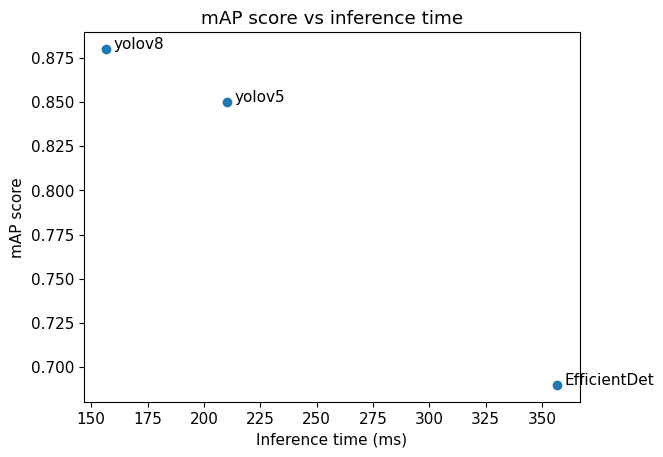

In [104]:
mAP_scores = {'yolov8': 0.88, 'yolov5':  0.85, 'EfficientDet': 0.69}
video_inference_time = {'yolov8': 156.66, 'yolov5': 210.46, 'EfficientDet': 356.66} # img_size - 400

x_values = list(video_inference_time.values())
y_values = list(mAP_scores.values())

plt.scatter(x_values, y_values)

plt.xlabel('Inference time (ms)')
plt.ylabel('mAP score')
plt.title('mAP score vs inference time')

for label, x, y in zip(mAP_scores.keys(), x_values, y_values):
    plt.annotate(label, xy=(x, y), xytext=(5, 0), textcoords='offset points')

plt.show()